In [53]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [50]:
class Bandit:
    def __init__(self, horizon, K, var):
        self.Horizon = horizon
        self.K = K #Number of Arms
        self.var = var
        self.Theta = [i*0.01 for i in range(10,45,5)]
        self.t = [0.1,0.2,0.3]
        self.mu_ci = [0,0,0]
        self.r = np.zeros([K,horizon], dtype = 'float')
        self.N = np.zeros(K,dtype='int') #Initialization number of times an arm is played
        self.reward = 0
        self.regret = []
    
    def initializeRewards(self):
        for i in range(self.K):
            for j in range(self.Horizon):
                self.r[i][j] = abs(random.gauss(self.mu_ci[i]+(j+1)**-self.t[i],self.var))
                                   
    
    def roundRobin(self):
        for i in range(self.K):
            arm = i
            self.reward += self.r[arm][int(self.N[arm])]
            self.N[arm] += 1
                                   
    def mu(self, mu_mean, n, theta_star):
        return mu_mean + (float(int(n/100)+1))**(-1*theta_star)
                                   
    
    def mu_sum(self, mu_c, n, theta): #Rotting part
        mu_t = np.zeros([len(mu_c),len(theta)])
        #print(mu_t.shape)
        for i in range(len(mu_c)):
            mu_t[i,:] = mu_c[i]
        for i in range(len(mu_c)):
            for j in range(len(theta)):
                for k in range(n[i]):
                    mu_t[i][j] += self.mu(mu_c[i], k, theta[j])
        #print(mu_t)
        return mu_t
                                
    def algo(self):
        lastRegret=0
        r_t = np.zeros(self.K)
        while np.sum(self.N) < self.Horizon:
            # Estimate true reward distribution for each arm
            r_t = [np.sum(self.r[i][:self.N[i]]) for i in range(self.K)]
            Y_t = (r_t - self.mu_sum(self.mu_ci, self.N, self.Theta).T).T
            theta_hat = np.argmin(np.abs(Y_t), axis = 1)
            # Select the arm with the highest value of mu
            arm = np.argmax([self.mu(self.mu_ci[i], self.N[i]+1, theta_hat[i]) for i in range(self.K)])
            muOracle=[self.mu(self.mu_ci[i], self.N[i]+1, self.t[i]) for i in range(self.K)]
            muMax=max(muOracle)
            muExpected=muOracle[arm]
            # Update the count for the selected arm
            self.N[arm] += 1
            # Get the regret for the given arm
            self.reward += self.r[arm][self.N[arm]]
            self.regret.append(lastRegret+muMax - muExpected)  # Use closest-to-origin approach
            lastRegret+=muMax - muExpected
                                   
    def plotRegret(self):
        plt.plot(self.regret)

In [54]:
simulation = Bandit(10000, 3, 0.2)

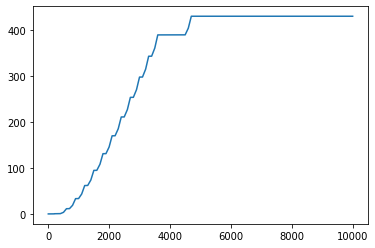

In [55]:
simulation.initializeRewards()
simulation.roundRobin()
simulation.algo()
simulation.plotRegret()